# 01: Classification

> Explainable AI for liquefaction

**Exercise:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/01-classification/01-classification-exercise.ipynb)
**Solution:** [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kks32-courses/sciml/blob/main/lectures/01-classification/01-classification.ipynb)

### Install packages

In [ ]:
!pip3 install scikit-learn pandas

## Liquefaction

> Durante, M. G., & Rathje, E. M. (2021). An exploration of the use of machine learning to predict lateral spreading. Earthquake Spectra, 37(4), 2288-2314.

Soil liquefaction is a phenomenon that typically occurs in saturated loose sandy soils subjected to rapid loading conditions, such as earthquakes. The generation of excess pore water pressure is a direct consequence of the rapid loading, which can lead to a sudden reduction in the strength and stiffness of the soil. In the presence of gently sloping ground or near the free face of a slope, the occurrence of earthquake-induced liquefaction may generate lateral displacements, known as lateral spreading.

![liquefaction](liquefaction.png)

> Fig: (a) Observed liquefaction-related damage (data from NZGD, 2013), and (b) lateral spreading
horizontal displacement observed from optical image correlation (data from Rathje et al., 2017b) in the
Avon River area for the 2011 Christchurch earthquake

## Lateral spreading classification

Durante and Rathje (2021) classified sites that experienced more than 0.3 m displacement as lateral spreading. We now evaluate different factors that influence soil lateral spreading, such as (i) Ground Water Table (ground water closer to surface means more chance of liquefaction), (ii) slope angle (steeper the slope more lateral spreading), (iii) PGA - Peak Ground acceleration (intensity of earthquake shaking), and (iv) elevation (certain sites on high terrace don't show lateral spreading).

![Factors affecting liquefaction](liq-factors.png)

> Image credits: Durante and Rathje (2021).

### Explore data

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/kks32-courses/sciml/main/lectures/01-classification/RF_YN_Model3.csv')

In [7]:
df.head()

,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target
0,182,0.370809,0.909116,0.319117,5.465739,0.546270,0
1,15635,1.300896,1.123009,0.211770,0.905948,0.532398,0
2,8292,1.300896,0.847858,0.195947,0.849104,0.532398,0
3,15629,1.788212,2.044325,0.115795,0.451034,0.542307,0
4,183,1.637517,2.003797,0.137265,0.941866,0.545784,1


### Filtering for features

Remove any feature in the dataset that we don't want to include in the training process.

In [8]:
df = df.drop(['Test ID', 'Elevation'], axis=1)
df.head()

,GWD (m),L (km),Slope (%),PGA (g),Target
0,0.370809,0.319117,5.465739,0.546270,0
1,1.300896,0.211770,0.905948,0.532398,0
2,1.300896,0.195947,0.849104,0.532398,0
3,1.788212,0.115795,0.451034,0.542307,0
4,1.637517,0.137265,0.941866,0.545784,1


In [9]:
X = df.copy(deep=True)
y = df['Target']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Target, dtype: int64

### Training, testing and validation

When developing a machine learning model, it is common practice to divide the available data into three subsets - training, validation, and testing. This is done to properly assess model performance and generalizability.

The training set is used to fit the parameters of the model. The majority of the data, typically 60-80%, is allocated for training so that the model can learn the underlying patterns.

The validation set is used to tune any hyperparameters of the model and make architectural choices. For example, it helps decide the number of hidden layers and units in a neural network. Typically 20% of data is used for validation.

The test set provides an unbiased evaluation of the fully-trained model's performance. It is critical for getting an accurate estimate of how the model will work on new unseen data. Usually 20% of the data is reserved for testing.

The splits should be made randomly while ensuring the class distribution is approximately balanced across all sets. No data from the validation or test sets should be used during training. This prevents overfitting and ensures the evaluation reflects real-world performance.

In [10]:
X

,GWD (m),L (km),Slope (%),PGA (g),Target
0,0.370809,0.319117,5.465739,0.546270,0
1,1.300896,0.211770,0.905948,0.532398,0
2,1.300896,0.195947,0.849104,0.532398,0
3,1.788212,0.115795,0.451034,0.542307,0
4,1.637517,0.137265,0.941866,0.545784,1
...,...,...,...,...,...
7286,1.631807,0.352863,0.839925,0.420179,0
7287,1.269804,0.584068,0.050562,0.416337,0
7288,1.500085,0.441609,0.360601,0.420179,0
7289,1.775998,0.353520,1.204065,0.420179,0


We are going to use the `train_test_split` function twice to split the data into training + validation and testing. Then, we split the `training + validation` into training and validation. We retrain the target values for now, so we can check how good is our prediction.

In [11]:
X_train_target, X_val_test_target, y_train, y_val_test = train_test_split(X, y, test_size=0.2)
X_test_target, X_val_target, y_test, y_val = train_test_split(X_val_test_target, y_val_test, test_size=0.2)

In [12]:
X_val_target

,GWD (m),L (km),Slope (%),PGA (g),Target
2074,2.243060,1.128009,0.556541,0.412280,1
3225,2.310902,1.983713,0.000000,0.413459,0
5816,3.042242,0.149327,0.661831,0.443339,0
4520,1.672946,0.603445,0.345039,0.420741,0
3056,2.001447,1.024880,0.816727,0.443319,1
...,...,...,...,...,...
3561,1.691960,0.755911,0.659987,0.474853,1
5725,2.835478,0.884954,1.378123,0.415294,0
4625,0.782569,0.996662,0.211627,0.413167,0
7188,1.217597,0.470850,0.766472,0.415762,0


In [13]:
X_train = X_train_target.drop(['Target'], axis=1)
X_test = X_test_target.drop(['Target'], axis=1)
X_val = X_val_target.drop(['Target'], axis=1)

In [14]:
X_test.head()

,GWD (m),L (km),Slope (%),PGA (g)
5703,1.342004,0.491025,5.150787,0.422555
4128,1.397046,0.072770,0.246042,0.513281
2347,2.186488,1.370897,0.508970,0.410625
3489,1.549115,0.861001,0.940807,0.471565
6496,1.990132,0.137762,0.612021,0.431009


In [15]:
y_test.head()

5703    0
4128    1
2347    0
3489    1
6496    0
Name: Target, dtype: int64

# Decision tree classifier

## Classification: Decision Trees

Classification is the task of predicting a categorical target variable based on input data. There are two main types of classification:

**Binary classification**: The target variable has two possible classes, often labeled 0 and 1. The goal is to predict which of the two classes an input belongs to. Examples include spam detection, disease diagnosis, etc.

**Multi-class classification**: The target variable has more than two possible discrete values or classes. The goal is to predict the specific class an input belongs to out of the multiple choices. Examples include image recognition, document categorization, etc.

A decision tree is a flowchart-like structure where each internal node represents a test on a feature (e.g., "is feature A > 5?"), each branch represents an outcome of the test, and each leaf node represents a class label. A decision tree is a supervised learning model used for both binary and multi-class classification. It works by recursively partitioning the input space into smaller subspaces based on the value of different predictor variables. The goal is to create leaf nodes that contain cases with similar values of the target variable. 

The process of learning a decision tree involves selecting features and split points that best separate the classes, based on a criterion such as information gain or Gini impurity. It continues until a stopping criterion is met, like reaching a maximum depth or a minimum number of samples per leaf.

The structure of a decision tree consists of:

  *  __Root node__: This is the topmost node in the tree and contains the full dataset.
  *  __Internal nodes__: These represent points where the data is split based on values of predictor variables.
  *  __Branches__: These connect the internal nodesbased on possible values of predictors.
  *  __Leaf nodes__: These represent the final classifications or predictions.

Decision trees can handle both categorical and continuous predictors. 

Some key advantages of decision trees are:

* __Interpretability__ - The tree structure and rules are easy to understand.
* __Non-parametric__ - No assumptions about data distribution.
* __Handles nonlinear relationships__ - By partitioning data recursively.
* __Handles categorical variables__ - No need for dummy coding.

![liquefaction decision tree](liq-dt.png)

### GINI Impurity

Gini impurity is used to evaluate how good a split is by calculating the impurity of the subsets resulting from the split. A lower Gini score means that the split is separating the classes well. It quantifies the disorder or uncertainty within a set of data.

The Gini impurity for a binary classification is calculated as:
$$Gini(t)=1−\sum(p_i)^2$$

where $p_i$​ is the probability of class $i$ in the set.

### Decision Tree splitting

A decision tree decides a split by selecting a feature and a value to divide the dataset into two or more homogenous subsets, according to a certain criterion. The ultimate goal is to find the splits that produce the purest subsets, meaning that each subset ideally contains data points from only one class. Here's how it works:

  - **Selection of Criteria**: The method used to decide a split depends on the criterion being used. Common criteria for classification tasks include Gini Impurity, Information Gain, and Chi-Squared. For regression tasks, variance reduction is often used.

  - **Evaluate Each Feature and Potential Split**: For each feature in the dataset, the algorithm calculates the criterion's value for every potential split point. Split points can be the actual values of a continuous feature or different categories of a categorical feature.

  - **Choose the Best Split**: The algorithm selects the feature and split point that produces the subsets with the highest purity according to the chosen criterion. For example:
        In the case of Gini Impurity, the best split minimizes the impurity.
        In the case of Information Gain, the best split maximizes the gain.

  - **Create Subsets**: Once the best split has been identified, the dataset is divided into subsets according to the chosen feature and split point.

  - **Repeat**: Steps 1-4 are repeated recursively on each of the subsets until a stopping criterion is met, such as reaching a certain tree depth or the subsets being pure enough.

#### Example Using Gini Impurity

  - For each feature, consider all possible values for splitting.
  - Choose the split that results in the lowest weighted Gini Impurity.
  - Calculate the Gini Impurity for each possible split as:
  - Divide the dataset accordingly and continue the process.

In the context of decision trees, the splitting process is essential as it helps the model generalize the pattern from the training data, enabling accurate predictions or classifications for unseen data. It's the core step in building the tree, and different algorithms might have variations in the splitting procedure.

## Decision tree with SciKit Learn

Scikit-learn, often referred to as sklearn, is one of the most popular libraries for machine learning in Python

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

In [16]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

Training score: 66.00%
Validation score: 63.70%
Testing score: 68.04%


In [19]:
accuracy_score(y_test, clf.predict(X_test))

0.6803770351328192

#### Prediction

In [ ]:
clf.predict(X_test)[4]

0

### Visualizing a decision tree

/var/folders/6k/lmrc2s553fq0vn7c57__f37r0000gn/T/ipykernel_49557/636362235.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


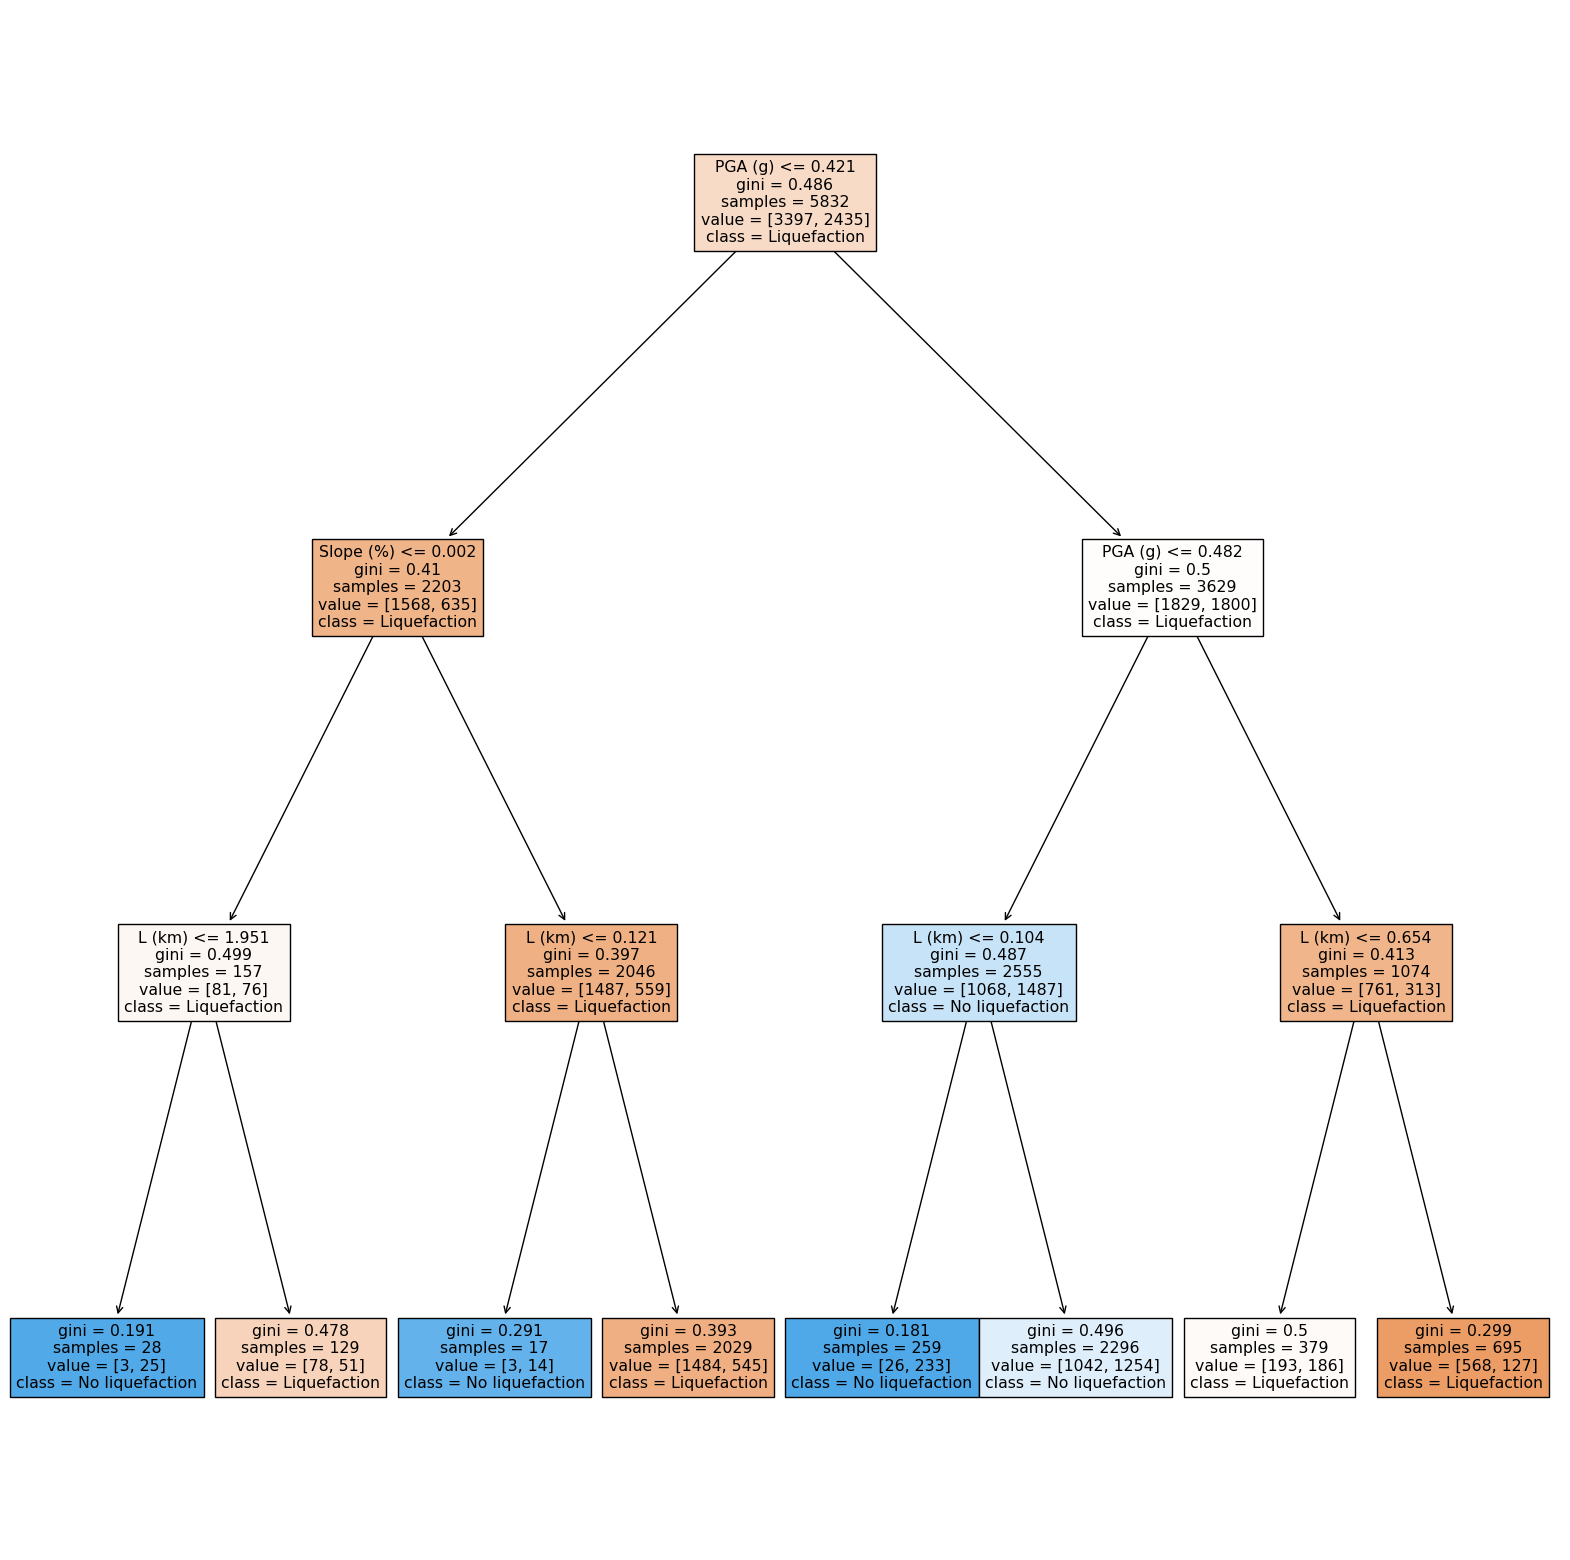

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, 
               feature_names =['GWD (m)', 'L (km)', 'Slope (%)', 'PGA (g)'],
               class_names=['Liquefaction', 'No liquefaction'],
               filled = True)
fig.show()

### Update model

We increase the `max_depth` to 7 so we have a better fit.

> 💡 Try varying the `max_depth` from 5 - 9.

In [73]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [74]:
print('Training score: %.2f%%' %(clf.score(X_train, y_train) * 100))
print('Validation score: %.2f%%' %(clf.score(X_val, y_val) * 100))
print('Testing score: %.2f%%' %(clf.score(X_test, y_test) * 100))

Training score: 77.85%
Validation score: 77.05%
Testing score: 74.98%


## Metrics

A confusion matrix is commonly used to evaluate the performance of a machine learning classification model. It is an N x N matrix that summarizes how well the model classifies examples into N distinct classes.

The confusion matrix compares the actual target values to the predicted values. It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class. A higher count of TP and TN indicates better model performance, while more FP and FN points mean the model is making errors.

Key evaluation metrics derived from the confusion matrix are accuracy, recall (or true positive rate), and precision. Accuracy measures the overall percentage of correct classifications, treating false positives and false negatives equally.

Recall calculates the fraction of positive cases that are correctly classified as positive. It looks across the rows of the confusion matrix. Precision looks down the columns, measuring the fraction of positive predictions that are true positives. High precision means few false positives.

For binary classification, the formulas for these metrics are:

Accuracy = $(TP + TN)/(TP + TN + FP + FN)$

Recall = $TP/(TP + FN)$ = TP/(all positive data)

Precision = $TP/(TP + FP)$ = TP/(all positive predictions)

The confusion matrix and these metrics provide a quantitative assessment of model performance on a classification problem. They highlight the types of errors and allow targeted improvement.

Researchers commonly use receiver operating characteristic (ROC) curves to evaluate the performance of machine learning classification models. A ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) for different classification probability thresholds. The TPR, also called recall, represents the percentage of positive cases correctly classified. The FPR represents the percentage of negative cases incorrectly classified as positive.

The FPR represents the fraction of the negative points that are incorrectly classified as positive (FPR = FP/(FP + TN) = FP/(all negative data)). An ideal classifier will have a ROC curve that passes through the top left corner, with a TPR of 1 and FPR of 0. A random classifier will have a ROC curve along the diagonal line where TPR equals FPR. Less accurate models have curves closer to the diagonal, while more accurate models have curves further up and left.

The area under the ROC curve (AUC) quantifies the model's performance. Larger AUC values indicate better classification, with a maximum of 1. AUC values near 0.5 imply performance equal to a random classifier.

Although designed for binary classification, ROC analysis can be extended to multi-class problems using a one-vs-rest approach. This involves creating a binary classifier for each class against the rest. The per-class ROC curves are averaged, weighting by class size, to produce an overall curve.

### Plot metrics

### Confusion Matrix

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, normalize=False):
    
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / len(y_true)
        cm = np.round(cm, decimals=3)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap=plt.cm.Blues)
    
    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xticklabels(['No','Yes']) 
    ax.set_yticklabels(['No','Yes'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    
    for i in range(2):
        for j in range(2):
            text = ax.text(j, i, cm[i, j], ha="center", va="center", color="black")
    
    ax.set_title('Confusion Matrix')    
    fig.tight_layout()
    plt.show()

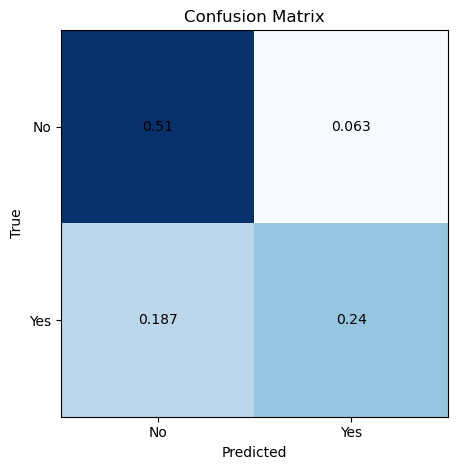

In [76]:
# make prediction on test set
y_pred = clf.predict(X_test)
# plot confusion matrix for test set
plot_confusion_matrix(y_test, y_pred, normalize=True)

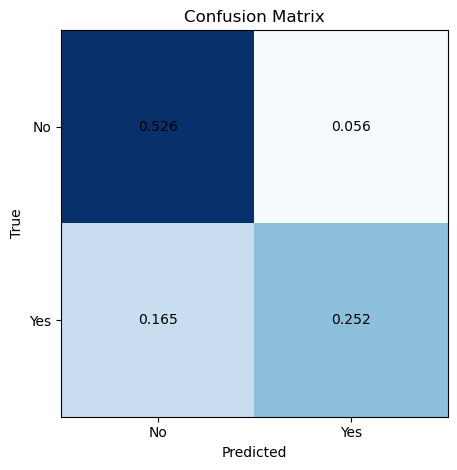

In [77]:
# make prediction on training set
y_pred_train = clf.predict(X_train)
# plot confusion matrix for training set
plot_confusion_matrix(y_train, y_pred_train, normalize = True)

### ROC

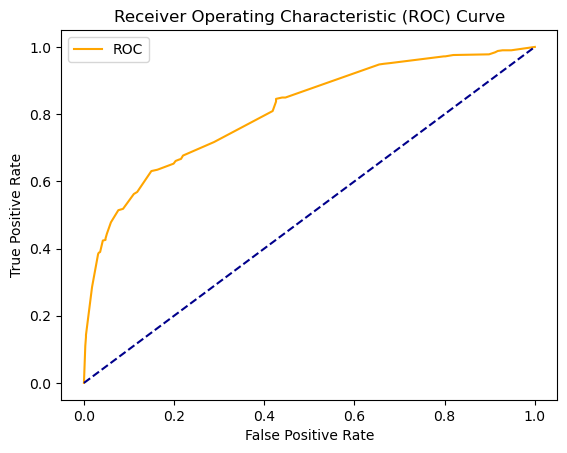

In [78]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

probs = clf.predict_proba(X_test)[:, 1]
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)

#### Precision recall curve

A precision-recall curve (PR curve) is another common technique used to evaluate the performance of classification models, alongside ROC curves. The PR curve plots precision vs. recall at different thresholds.

Precision measures the fraction of positive predictions that are true positives, while recall (same as true positive rate) measures the fraction of actual positives correctly predicted as positive.

A PR curve shows the tradeoff between precision and recall. High recall means detecting most of the positive cases, but potentially more false positives. High precision means positive predictions are more accurate, but some positives may be missed.

The curve is generated by varying the classification threshold and plotting precision and recall at each threshold. A perfect classifier will have a horizontal line at precision = 1. Random guessing produces a diagonal line.

The area under the PR curve (AUC) summarizes the overall performance. Higher AUC indicates better classification performance.

__Advantages of PR curves__:

 - Better visualization of performance for imbalanced classes. ROC curves can hide poor performance on the minority class.
 - Directly shows precision-recall tradeoff important for many applications.
 - Can be more useful than ROC curves when the positive class is more important.

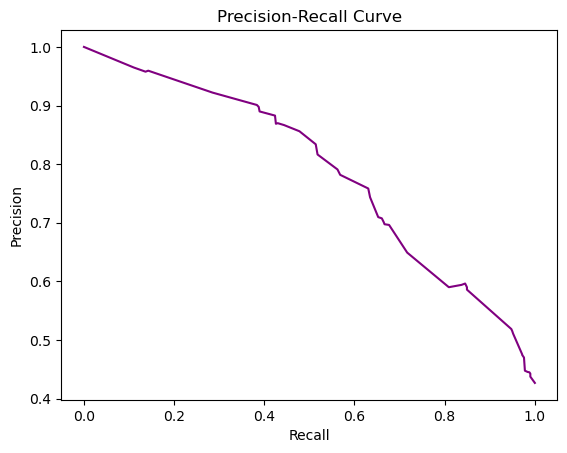

In [79]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

#use logistic regression model to make predictions
y_score = clf.predict_proba(X_test)[:, 1]

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### Summary of decision trees


Pros and Cons
- Pros: Simple to understand and visualize, able to handle categorical and numerical data.
- Cons: Prone to overfitting, especially when the tree is deep, leading to poor generalization to unseen data. A small change in the data can lead to a very different tree.

## Random Forest

A random forest is an ensemble method that builds multiple decision trees and combines their predictions. Here's how it works:

**Bootstrapping**: For each tree in the forest, a subset of the training data is sampled with replacement. This helps in reducing overfitting by ensuring that each tree in the forest sees a slightly different subset of the data.

**Random Feature Selection**: When splitting a node, a random subset of features is considered. This further decorrelates the trees and improves generalization.

**Voting or Averaging**: For a classification problem, the mode of the classes predicted by individual trees is taken, and for regression, the mean prediction is used.

**Pros and Cons**

- Pros: Reduced risk of overfitting compared to a single decision tree, often gives better predictive performance, handles missing data well.
- Cons: More computationally expensive, harder to interpret because of the ensemble nature.

**Difference Between Random Forest and Decision Tree**

- Composition: A decision tree is a single tree, while a random forest is a collection of decision trees.
- Overfitting: Random forests are generally less prone to overfitting compared to individual decision trees.
- Prediction: A decision tree makes a prediction based on a single path through the tree, while a random forest averages or takes a vote from multiple trees.
- Computation and Interpretation: Random forests are more computationally intensive and less interpretable than individual decision trees.


In the context of SciML, both decision trees and random forests can be powerful tools. Decision trees are often used for their interpretability and simplicity, while random forests are employed for their robustness and improved predictive accuracy. Understanding the underlying mechanics and differences between these methods can help researchers and practitioners make informed choices for their specific applications.

![Decision tree vs Random Forest](decision-tree-rf.png)

### Automatic Hyperparameter tuning

Like we varied `max_depth`, there are other hyperparameters than can be tuned to improve performance. 

[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

Cohen's kappa score measures the agreement between two raters/classifiers while taking into account the agreement expected by chance.

The $\kappa$ score is calculated as:

$$\kappa = (p_o - p_e) / (1 - p_e)$$

Where:

    $p_o$ is the observed agreement between raters (accuracy)
    $p_e$ is the expected agreement by chance

Values range from -1 to 1, where 0 is chance level agreement and 1 is perfect agreement.

In machine learning, kappa can be used as an evaluation metric for classification models. It gives a more robust measure of performance than simple accuracy, by accounting for random chance.

`GridSearchCV` is a tool in sklearn to perform hyperparameter tuning. It tries out all combinations of specified hyperparameters, fits a model on each, and returns the best performing configuration based on a scoring metric (like kappa).

So in this approach, we are using `GridSearchCV` to optimize the hyperparameters of a Random Forest Classifier to maximize the kappa score, rather than just overall accuracy.

The goal is to tune hyperparameters like `max_depth`, `n_estimators` etc. to find the values that result in the best kappa score, indicating the model's predictions have the strongest agreement with the true labels after accounting for chance.

This often results in a model that generalizes better than just optimizing for accuracy. The final model can then be evaluated with cross-validation to estimate real-world performance.

In [85]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import cohen_kappa_score, roc_curve, roc_auc_score, accuracy_score, classification_report, make_scorer 
from sklearn.ensemble import RandomForestClassifier

In [88]:
#define function to find best parameter combination based on Cohen’s kappa coefficient 
def rfr_model(X, y):
# Perform Grid-Search
    kappa_scorer = make_scorer(cohen_kappa_score)
    gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'max_depth': range(2,10),
            'n_estimators': (5,10, 50, 100, 1000),
            'max_features': ('auto','sqrt','log2'),
            'criterion': ('gini','entropy'),
        },
        cv=10, verbose=0, n_jobs=-1,scoring=kappa_scorer)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestClassifier(max_depth=best_params["max_depth"], 
                                 n_estimators=best_params["n_estimators"], 
                                 max_features=best_params["max_features"], criterion = best_params["criterion"])
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10)
    predictions = cross_val_predict(rfr, X, y, cv=10)
    optimised_random_forest = gsc.best_estimator_

    print("Scores: {}", scores)
    return scores, optimised_random_forest

In [89]:
# run optimization algorithm and print CV scores
scores, rf = rfr_model(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/gns/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
622 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/gns/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/gns/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/gns/lib/python3.11/site-packages

[0.78 0.78 0.77 0.8  0.81 0.81 0.77 0.77 0.8  0.78]


In [90]:
#print GridSearch results
print('Best parameters:', rf)
print('---')
print('CV scores:', scores)
print('CV scores (average):', mean(scores))
print('Training score:', rf.score(X_train, y_train))
print('Testing score:', rf.score(X_test, y_test))
print('Overall score:', rf.score(X, y))

Best parameters: RandomForestClassifier(max_depth=9)
---
CV scores: [0.78 0.78 0.77 0.8  0.81 0.81 0.77 0.77 0.8  0.78]


NameError: name 'mean' is not defined

## Extreme Gradient Boosting

In [ ]:
!pip install xgboost

In [ ]:
import xgboost

In [ ]:
xgb = xgboost.XGBClassifier(max_depth=9)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb.score(X_val, y_val)

0.8664383561643836

In [ ]:
xgb.score(X_test, y_test)

0.8543273350471294

In [ ]:
clf.score(X_test, y_test)

0.8063410454155956

## Explainable AI with SHAP

In [ ]:
!pip install shap

In [ ]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_test)

In [ ]:
X_test_target.head()

,GWD (m),L (km),Slope (%),PGA (g),Target
1494,2.389243,1.458294,1.042721,0.373080,1
2137,1.798434,0.742778,0.834584,0.424421,1
4589,2.050072,2.451880,1.738290,0.371928,0
161,1.566298,2.154551,0.909582,0.377088,0
4893,1.466750,1.989314,0.892403,0.382741,0


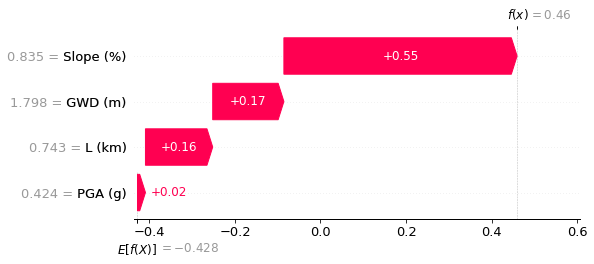

In [ ]:
shap.plots.waterfall(shap_values[1])

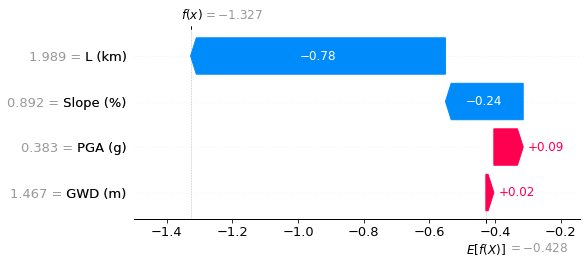

In [ ]:
shap.plots.waterfall(shap_values[4])

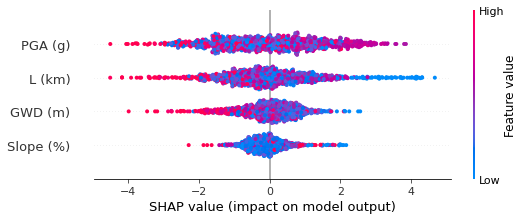

In [ ]:
shap.plots.beeswarm(shap_values)